In [273]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score, f1_score, log_loss,\
classification_report, roc_curve
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

In [274]:
import warnings
warnings.filterwarnings("ignore") 

# Знакомство с данными

In [275]:
statlog_german_credit_data = fetch_ucirepo(id=144)   
df = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets

In [276]:
y = abs(y - 2)
y.value_counts()

class
1        700
0        300
Name: count, dtype: int64

In [277]:
column_names = {
    'Attribute1': 'checking_status',
    'Attribute2': 'duration', 
    'Attribute3': 'credit_history',
    'Attribute4': 'purpose',
    'Attribute5': 'credit_amount',
    'Attribute6': 'savings',
    'Attribute7': 'employment',
    'Attribute8': 'installment_rate',
    'Attribute9': 'personal_status',
    'Attribute10': 'other_debtors',
    'Attribute11': 'residence_since',
    'Attribute12': 'property',
    'Attribute13': 'age',
    'Attribute14': 'other_installment',
    'Attribute15': 'housing',
    'Attribute16': 'number_credits',
    'Attribute17': 'job',
    'Attribute18': 'people_liable',
    'Attribute19': 'telephone',
    'Attribute20': 'foreign_worker'
}

df = df.rename(columns=column_names)

In [278]:
mapping = {
    'A11' : '... < 0 DM',
	'A12' : '0 <= ... < 200 DM',
	'A13' : '... >= 200 DM',
    'A14' : 'no checking account',
    'A30' : 'no credits taken / all credits paid back duly',
    'A31' : 'all credits at this bank paid back duly',
	'A32' : 'existing credits paid back duly till now',
    'A33' : 'delay in paying off in the past',
	'A34' : 'critical account / other credits existing (not at this bank)',
    'A40' : 'car (new)',
    'A41' : 'car (used)',
    'A42' : 'furniture / equipment',
    'A43' : 'radio / television',
    'A44' : 'domestic appliances',
    'A45' : 'repairs',
    'A46' : 'education',
    'A47' : '(vacation - does not exist?)',
    'A48' : 'retraining',
    'A49' : 'business',
    'A410' : 'others',
    'A61' : '... < 100 DM',
	'A62' : '100 <= ... <  500 DM',
	'A63' : '500 <= ... < 1000 DM',
	'A64' : '... >= 1000 DM',
    'A65' : 'unknown/ no savings account',
    'A71' : 'unemployed',
	'A72' : '... < 1 year',
	'A73' : '1 <= ... < 4 years',  
	'A74' : '4 <= ... < 7 years',
	'A75' : '... >= 7 years',
    'A91' : 'male: divorced / separated',
    'A92' : 'female: divorced / separated / married',
    'A93' : 'male: single',
    'A94' : 'male: married / widowed',
    'A95' : 'female: single',
    'A101' : 'none',
	'A102' : 'co-applicant',
	'A103' : 'guarantor',
    'A121' : 'real estate',
    'A122' : 'building society savings agreement / life insurance',
    'A123' : 'car or other',
    'A124' : 'unknown / no property',
    'A141' : 'bank',
	'A142' : 'stores',
	'A143' : 'none',
    'A151' : 'rent',
	'A152' : 'own',
	'A153' : 'for free',
    'A171' : 'unemployed / unskilled  - non-resident',
	'A172' : 'unskilled - resident',
	'A173' : 'skilled employee / official',
	'A174' : 'management / self-employed / highly qualified employee/ officer',
    'A191' : 'none',
	'A192' : 'yes, registered under the customers name',
    'A201' : 'yes',
	'A202' : 'no'
}
df = df.replace(mapping)

In [279]:
df.tail()

,checking_status,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status,other_debtors,residence_since,property,age,other_installment,housing,number_credits,job,people_liable,telephone,foreign_worker
995,no checking account,12,existing credits paid back duly till now,furniture / equipment,1736,... < 100 DM,4 <= ... < 7 years,3,female: divorced / separated / married,none,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,... < 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male: divorced / separated,none,4,building society savings agreement / life insu...,40,none,own,1,management / self-employed / highly qualified ...,1,"yes, registered under the customers name",yes
997,no checking account,12,existing credits paid back duly till now,radio / television,804,... < 100 DM,... >= 7 years,4,male: single,none,4,car or other,38,none,own,1,skilled employee / official,1,none,yes
998,... < 0 DM,45,existing credits paid back duly till now,radio / television,1845,... < 100 DM,1 <= ... < 4 years,4,male: single,none,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes
999,0 <= ... < 200 DM,45,critical account / other credits existing (not...,car (used),4576,100 <= ... < 500 DM,unemployed,3,male: single,none,4,car or other,27,none,own,1,skilled employee / official,1,none,yes


In [280]:
df.nunique()

checking_status        4
duration              33
credit_history         5
purpose               10
credit_amount        921
savings                5
employment             5
installment_rate       4
personal_status        4
other_debtors          3
residence_since        4
property               4
age                   53
other_installment      3
housing                3
number_credits         4
job                    4
people_liable          2
telephone              2
foreign_worker         2
dtype: int64

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checking_status    1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   credit_amount      1000 non-null   int64 
 5   savings            1000 non-null   object
 6   employment         1000 non-null   object
 7   installment_rate   1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residence_since    1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  other_installment  1000 non-null   object
 14  housing            1000 non-null   object
 15  number_credits     1000 non-null   int64 
 16  job                1000 non-null   object
 

In [282]:
df['checking_status'].value_counts()

checking_status
no checking account    394
... < 0 DM             274
0 <= ... < 200 DM      269
... >= 200 DM           63
Name: count, dtype: int64

# Распределение целевой переменной

In [283]:
df['default'] = y

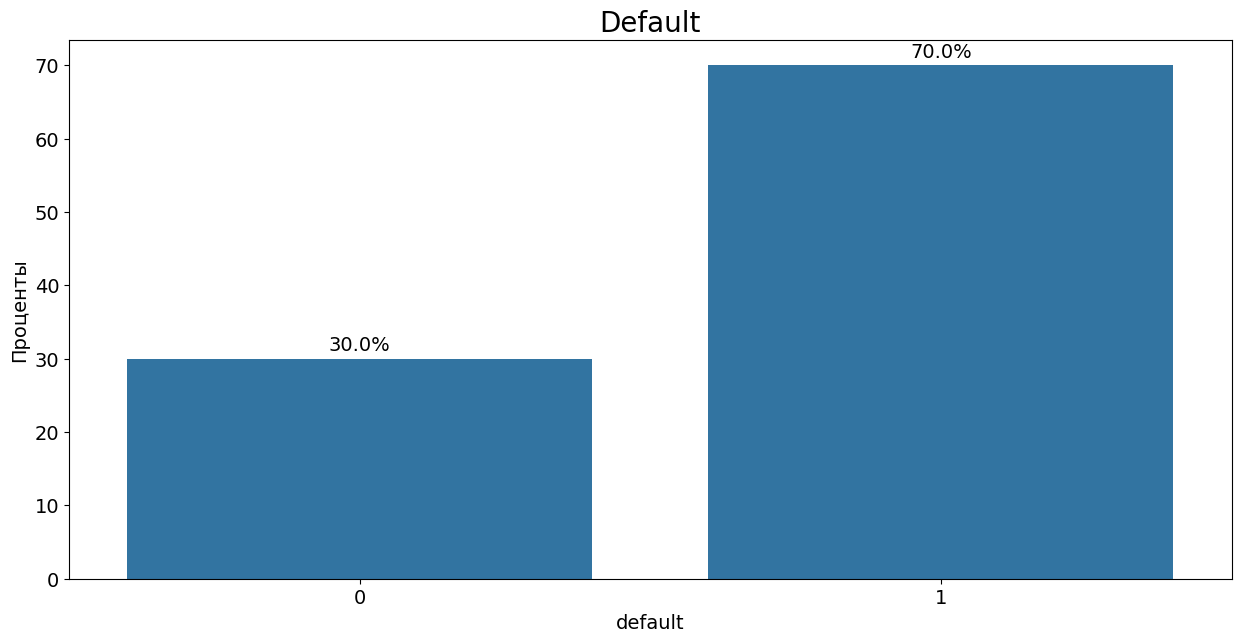

In [284]:
norm_target = (df
               .default
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(data=norm_target, x='default', y='percent')

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=14)

plt.title('Default', fontsize=20)

plt.xlabel('default', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

1 - Хорошо, 0 - Плохо

# Гипотезы
1) Чем выше возраст заемщика, тем меньше вероятность дефолта
2) Чем выше стаж работы заемщика, тем меньше вероятность дефолта
3) Заемщики с низкими накоплениями имеют более высокую вероятность дефолта
4) Чем выше сумма кредита, тем меньше вероятность того, что заемщик ее вернет
5) Если у заемщика больше 1 кредита, то у него высокая вероятность дефолта

## Возраст

(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045]),
 [Text(0, 0.0, '0.000'),
  Text(0, 0.005, '0.005'),
  Text(0, 0.01, '0.010'),
  Text(0, 0.015, '0.015'),
  Text(0, 0.02, '0.020'),
  Text(0, 0.025, '0.025'),
  Text(0, 0.03, '0.030'),
  Text(0, 0.035, '0.035'),
  Text(0, 0.04, '0.040'),
  Text(0, 0.045, '0.045')])

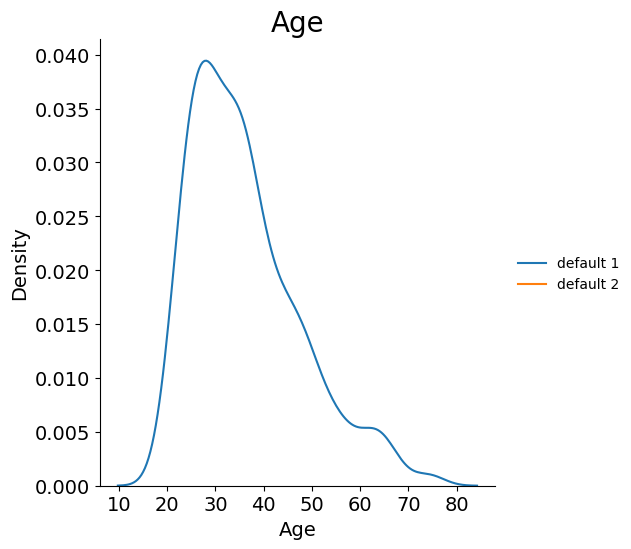

In [285]:
sns.displot(
    {
        "default 1": df[df.default == 1].age,
        "default 2": df[df.default == 2].age
    },
    kind='kde',
    common_norm=False
)
plt.title("Age", fontsize=20)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Density", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [286]:
df.groupby('default')['age'].mean()

default
0    33.963333
1    36.224286
Name: age, dtype: float64

In [287]:
df.groupby('default')['age'].median()

default
0    31.0
1    34.0
Name: age, dtype: float64

In [288]:
df.groupby('default')['age'].apply(lambda x: x.value_counts().index[0]).reset_index()

,default,age
0,0,23
1,1,27


Есть небольшие различия по возрасту в разрезе deafult. Поэтому будем считать, что оснований отвергнуть гипотезу нет.

## Трудоустройство

In [289]:
df.employment.unique()

array(['... >= 7 years', '1 <= ... < 4 years', '4 <= ... < 7 years',
       'unemployed', '... < 1 year'], dtype=object)

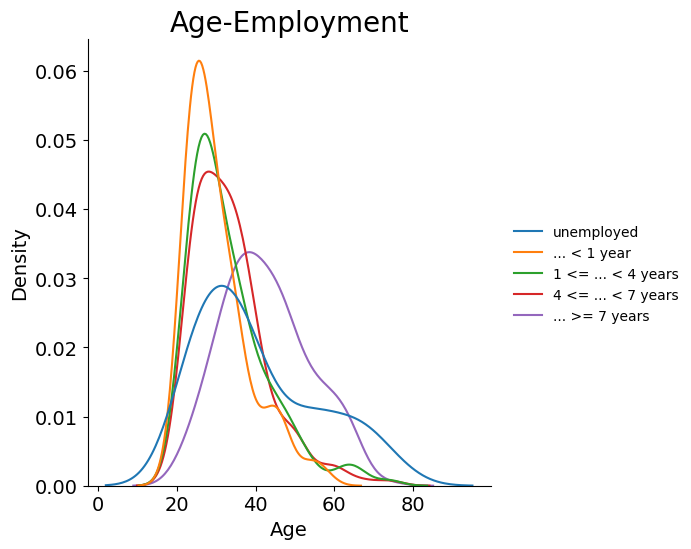

In [290]:
sns.displot(
    {
        "unemployed": df[df.employment == 'unemployed'].age,
        "... < 1 year": df[df.employment == '... < 1 year'].age,
        "1 <= ... < 4 years": df[df.employment == '1 <= ... < 4 years'].age,
        "4 <= ... < 7 years": df[df.employment == '4 <= ... < 7 years'].age,
        "... >= 7 years": df[df.employment == '... >= 7 years'].age,
    },
    kind="kde",
    common_norm=False
)

plt.title('Age-Employment', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Самые молодые - те, кто только начал работать. Вероятно, они и будут являться плохими заемщиками. Те же, кто работает больше 7 лет, имеют более высокий возраст, поэтому скорее всего будут более надежными заемщиками. Нетрудоустроенные вероятно, могли иметь работу в прошлом, поэтому их возрасть тоже немного смещен в большую сторону, поэтому в их случае все не так однозначно.

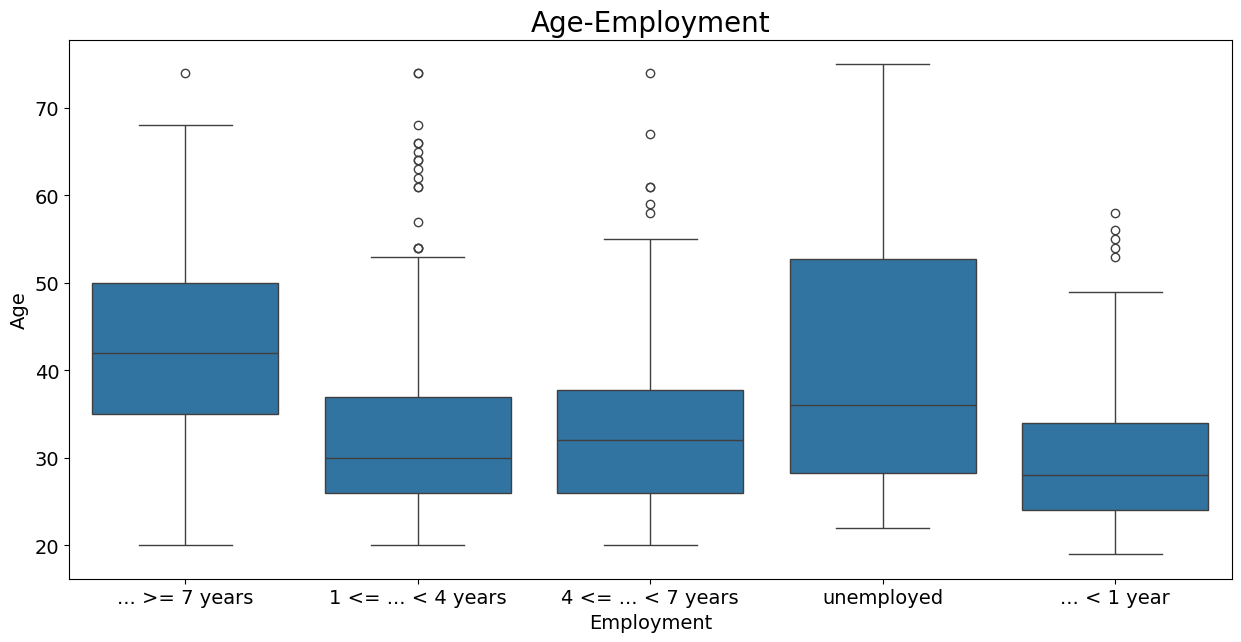

In [291]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='employment', y='age', data=df)

plt.title('Age-Employment', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Employment', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

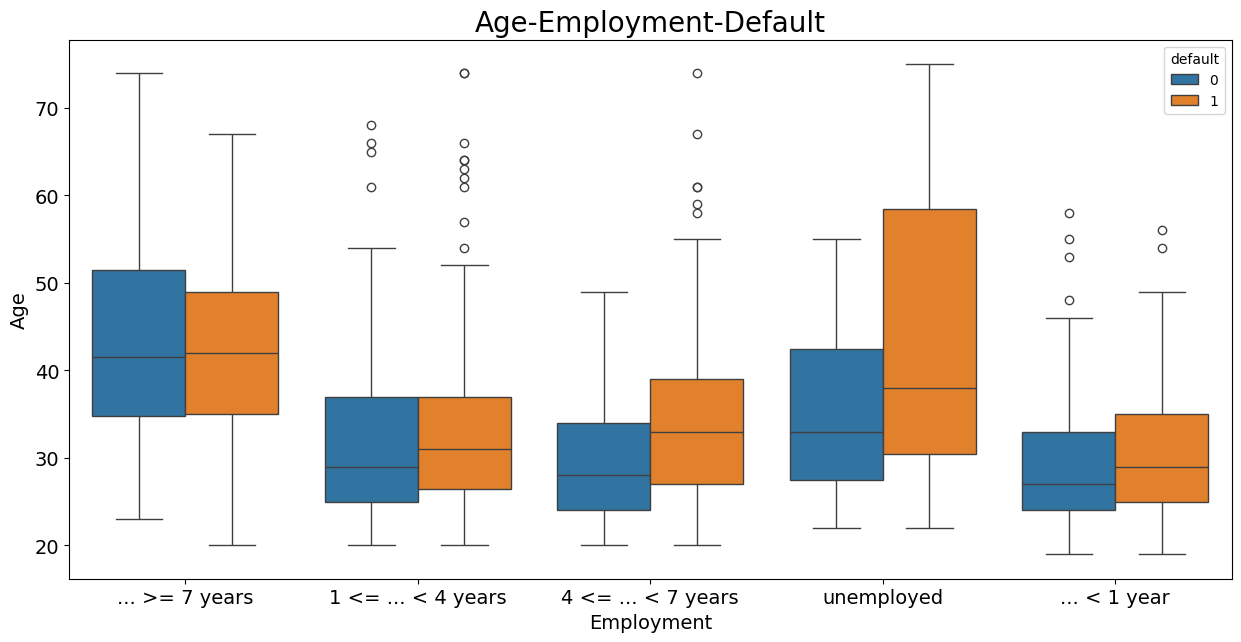

In [292]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='employment', y='age', hue='default', data=df)

plt.title('Age-Employment-Default', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Employment', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Как мы видим, у всех хороших заемщиков средний возраст выше, чем у плохих.

In [293]:
df.groupby('employment')['age'].median()

employment
... < 1 year          28.0
... >= 7 years        42.0
1 <= ... < 4 years    30.0
4 <= ... < 7 years    32.0
unemployed            36.0
Name: age, dtype: float64

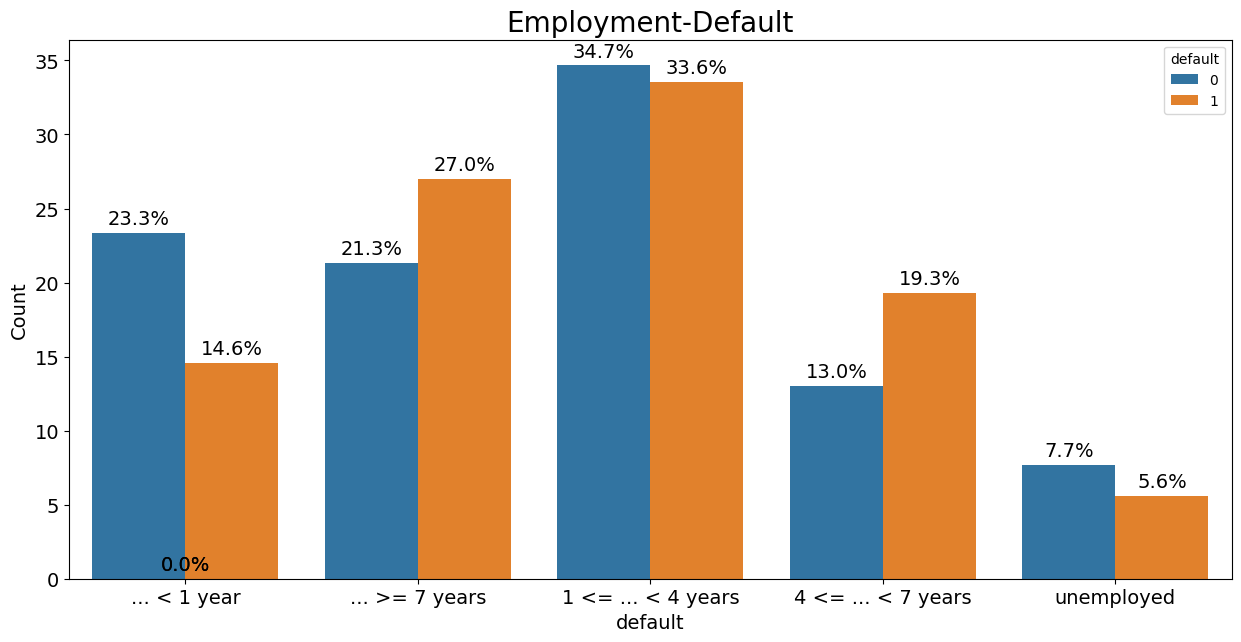

In [294]:
plt.figure(figsize=(15, 7))

empl_def = (df.groupby(['default'])['employment']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('employment'))

ax = sns.barplot(x="employment", y="percentage", hue="default", data=empl_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=14)

plt.title('Employment-Default', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('default', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Видим, что процент ненадежных заемщиков выше у тех, кто не работает меньше 4 лет, и у нетрудоустроенных.

## Накопления

In [295]:
df.savings.unique()

array(['unknown/ no savings account', '... < 100 DM',
       '500 <= ... < 1000 DM', '... >= 1000 DM', '100 <= ... <  500 DM'],
      dtype=object)

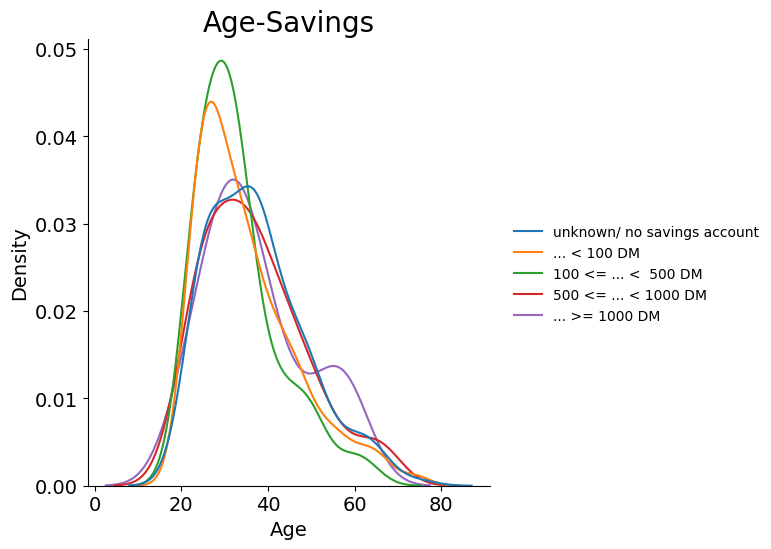

In [296]:
sns.displot(
    {
        "unknown/ no savings account": df[df.savings == 'unknown/ no savings account'].age,
        "... < 100 DM": df[df.savings == '... < 100 DM'].age,
        "100 <= ... <  500 DM": df[df.savings == '100 <= ... <  500 DM'].age,
        "500 <= ... < 1000 DM": df[df.savings == '500 <= ... < 1000 DM'].age,
        "... >= 1000 DM": df[df.savings == '... >= 1000 DM'].age,  
    },
    kind="kde",
    common_norm=False
)

plt.title('Age-Savings', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Аналогично прошлому случаю видим, что заемщики с большими накоплениями преимущественно большего возраста, чем с малыми.

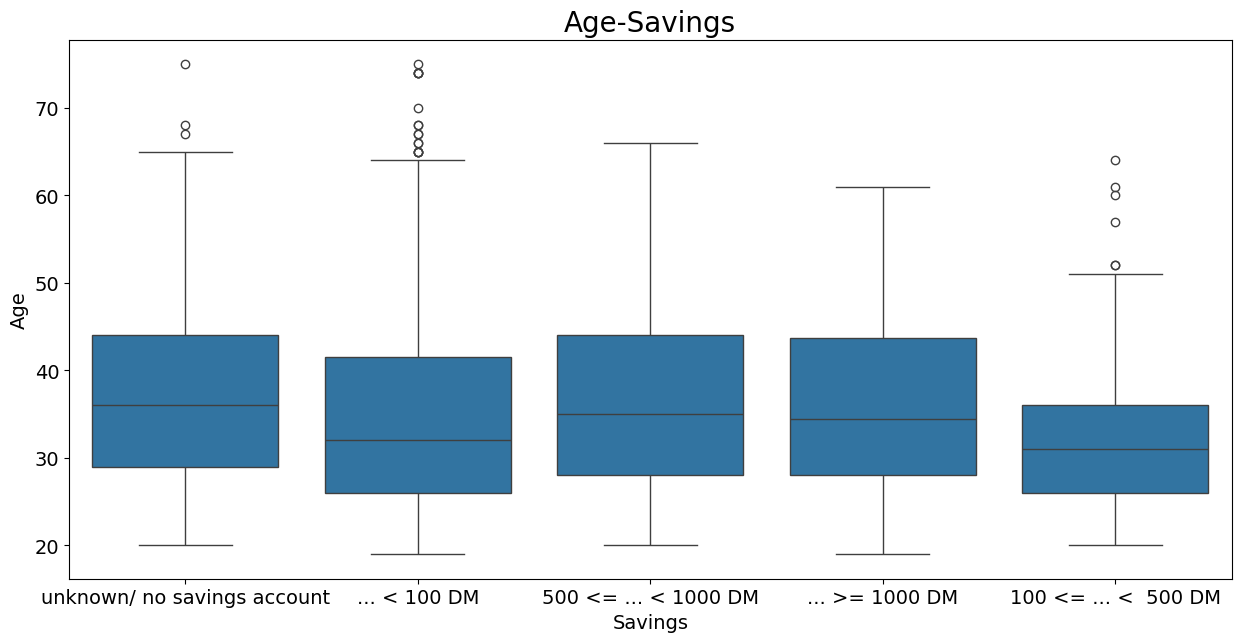

In [297]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='savings', y='age', data=df)

plt.title('Age-Savings', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Savings', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

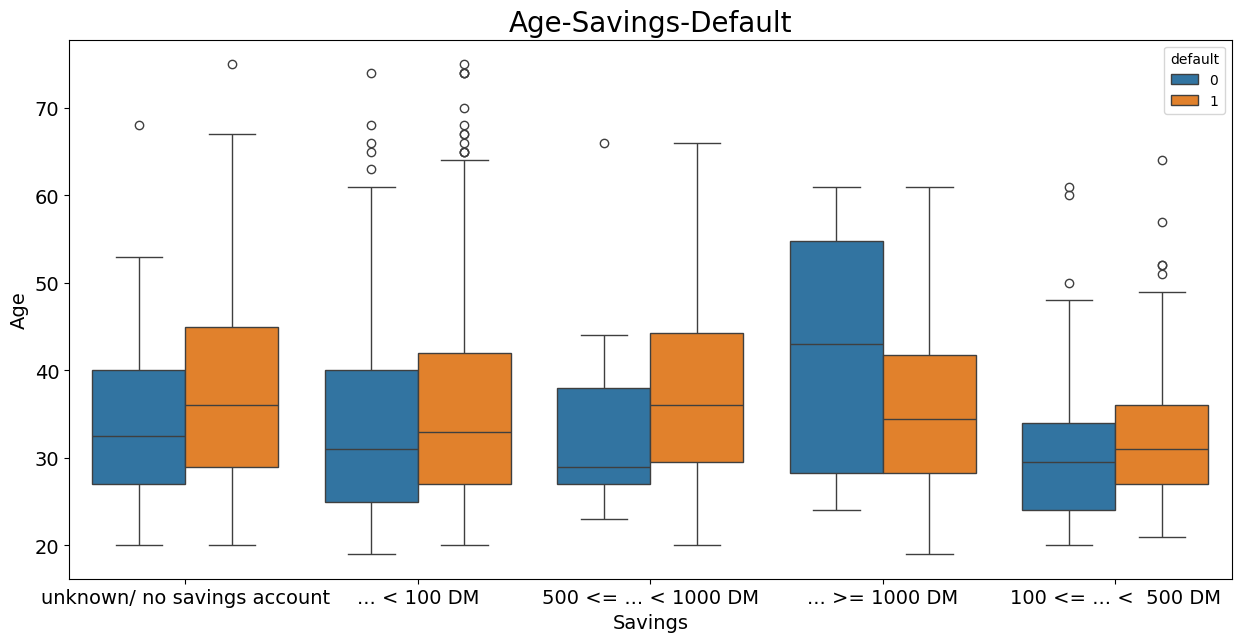

In [298]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='savings', y='age', hue='default', data=df)

plt.title('Age-Savings-Default', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Savings', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Удивительно, но у заемщиков с наибольшими накоплениями средний возраст плохих заемщиков сильно выше среднего возраста хороших. Возможно, в неком возрастном интервале, то внутри этой группы данный показатель не будет сильно влиять на полную выплату кредита.

In [299]:
df.groupby('savings')['age'].median()

savings
... < 100 DM                   32.0
... >= 1000 DM                 34.5
100 <= ... <  500 DM           31.0
500 <= ... < 1000 DM           35.0
unknown/ no savings account    36.0
Name: age, dtype: float64

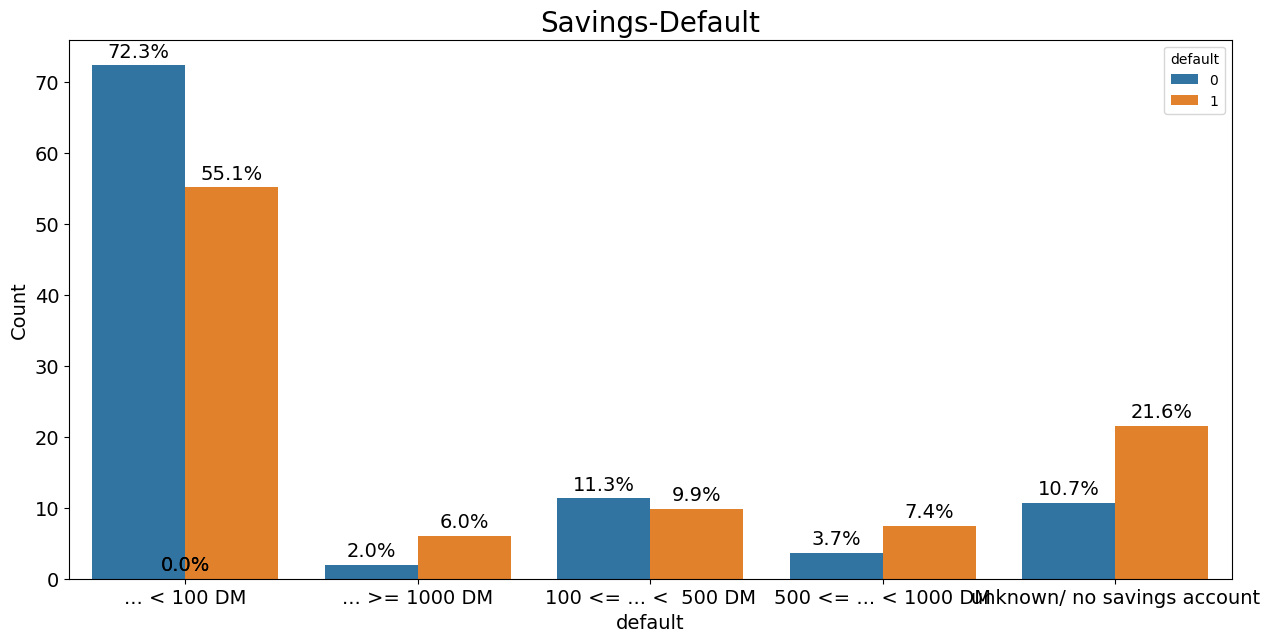

In [300]:
plt.figure(figsize=(15, 7))

save_def = (df.groupby(['default'])['savings']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('savings'))

ax = sns.barplot(x="savings", y="percentage", hue="default", data=save_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=14)

plt.title('Savings-Default', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('default', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Опять же видим, что у заемщиков с низкими накоплениями выше шанс дефолта. Также обратим внимание на то, что у замещиков с неизвестными или пустыми накоплениями, накопления скорее всего есть.

## Размер кредита

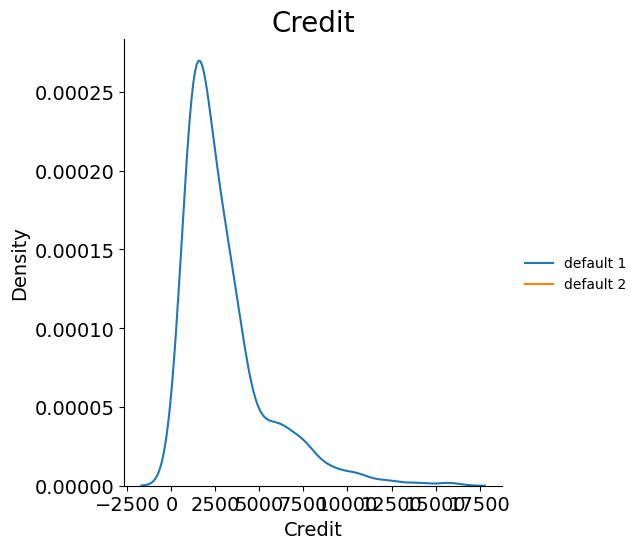

In [301]:
sns.displot(
    {
        "default 1": df[df.default == 1].credit_amount,
        "default 2": df[df.default == 2].credit_amount
    },
    kind='kde',
    common_norm=False
)
plt.title("Credit", fontsize=20)
plt.xlabel("Credit", fontsize=14)
plt.ylabel("Density", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [302]:
df.groupby('default')['credit_amount'].mean()

default
0    3938.126667
1    2985.457143
Name: credit_amount, dtype: float64

In [303]:
df.groupby('default')['credit_amount'].median()

default
0    2574.5
1    2244.0
Name: credit_amount, dtype: float64

In [304]:
df.groupby('default')['credit_amount'].apply(lambda x: x.value_counts().index[0]).reset_index()

,default,credit_amount
0,0,2039
1,1,1262


Различия, как говорится, на глаз

## Количество кредитов

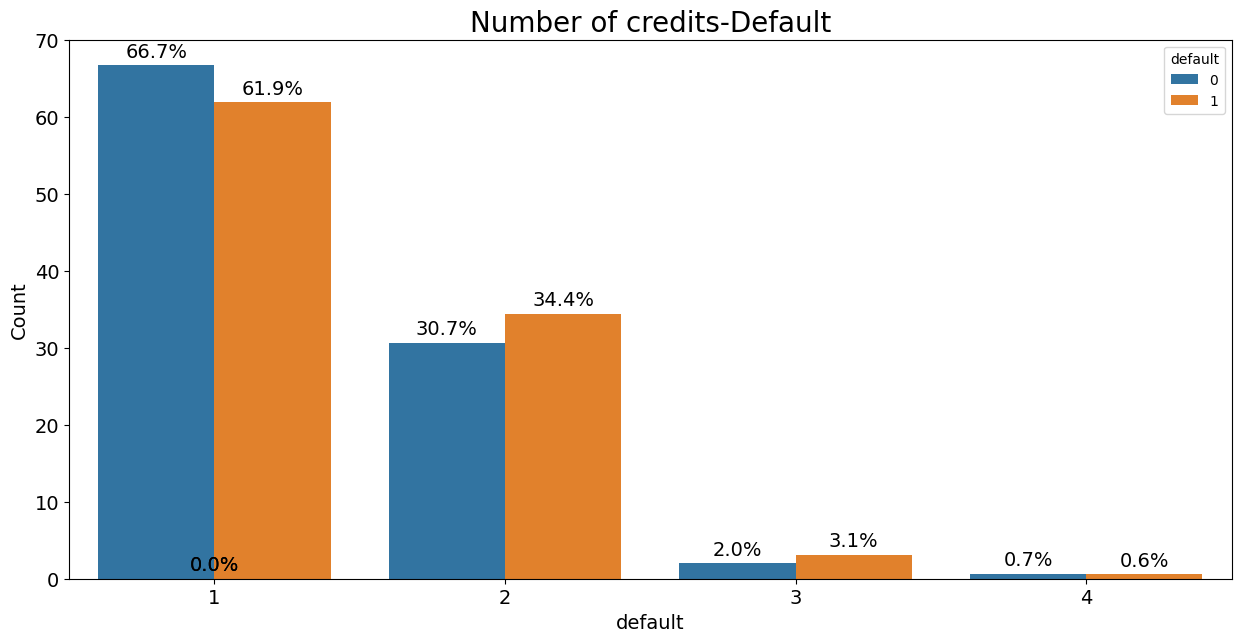

In [305]:
plt.figure(figsize=(15, 7))

empl_def = (df.groupby(['default'])['number_credits']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('number_credits'))

ax = sns.barplot(x="number_credits", y="percentage", hue="default", data=empl_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=14)

plt.title('Number of credits-Default', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('default', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Как видим, у заемщиков с 1 кредитом выше вероятность дефолта, чем в у заемщиков с болшим их количеством. Вероятно, гипотеза не верна.

In [306]:
df.groupby('default')['number_credits'].mean()

default
0    1.366667
1    1.424286
Name: number_credits, dtype: float64

In [307]:
df.groupby('default')['number_credits'].median()

default
0    1.0
1    1.0
Name: number_credits, dtype: float64

In [308]:
df.groupby('default')['number_credits'].apply(lambda x: x.value_counts().index[0]).reset_index()

,default,number_credits
0,0,1
1,1,1


Различий фактически нет, так что отвергаем гипотезу.

# Feature engineering

In [309]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings', 'employment', 'installment_rate',
       'personal_status', 'other_debtors', 'residence_since', 'property',
       'age', 'other_installment', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'default'],
      dtype='object')

In [310]:
num_cols = ['default', 'duration', 'credit_amount', 'installment_rate', 'age', 'number_credits', 'people_liable']
num_cols

['default',
 'duration',
 'credit_amount',
 'installment_rate',
 'age',
 'number_credits',
 'people_liable']

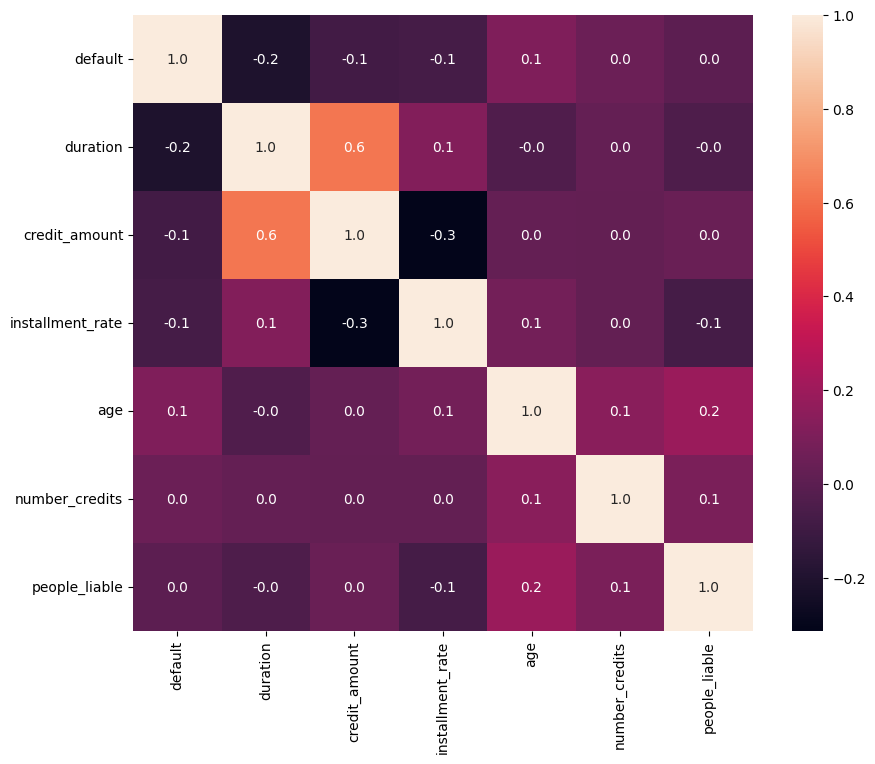

In [311]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(method='spearman'), annot=True, fmt=".1f");

In [312]:
cat_cols = [col for col in df.columns if col not in num_cols]
cat_cols

['checking_status',
 'credit_history',
 'purpose',
 'savings',
 'employment',
 'personal_status',
 'other_debtors',
 'residence_since',
 'property',
 'other_installment',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

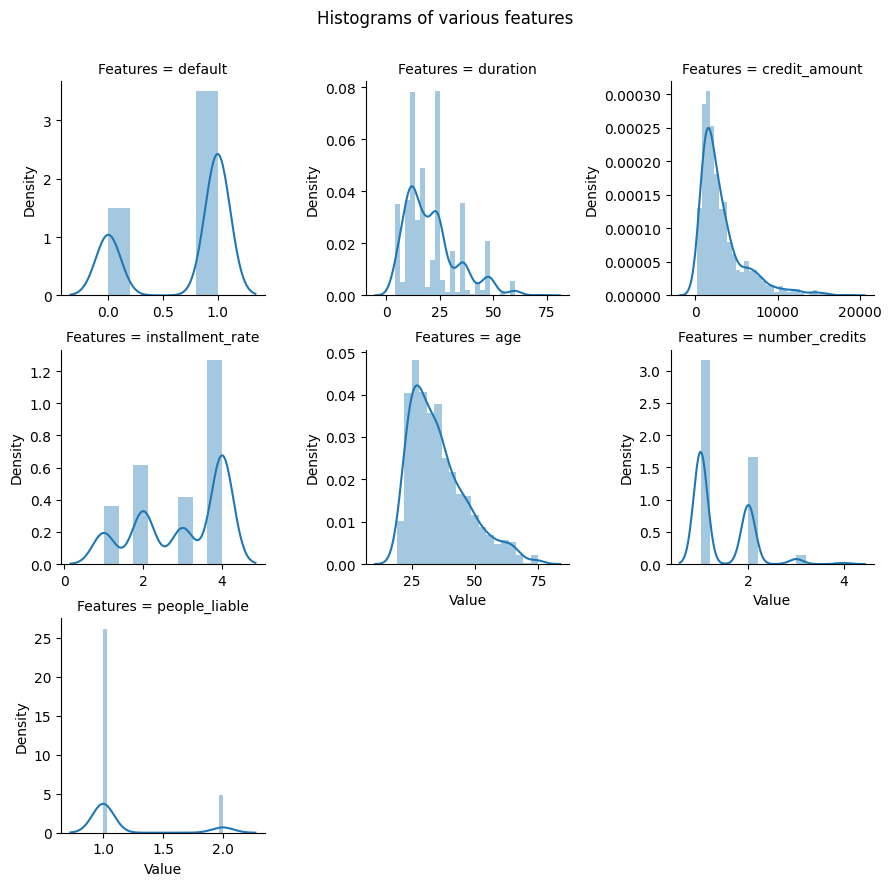

In [313]:
numeric_features = df[num_cols]
numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})
ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")
plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");

In [314]:
for i in ['duration', 'credit_amount', 'age']:
    df[i] = np.log(df[i] + 1)

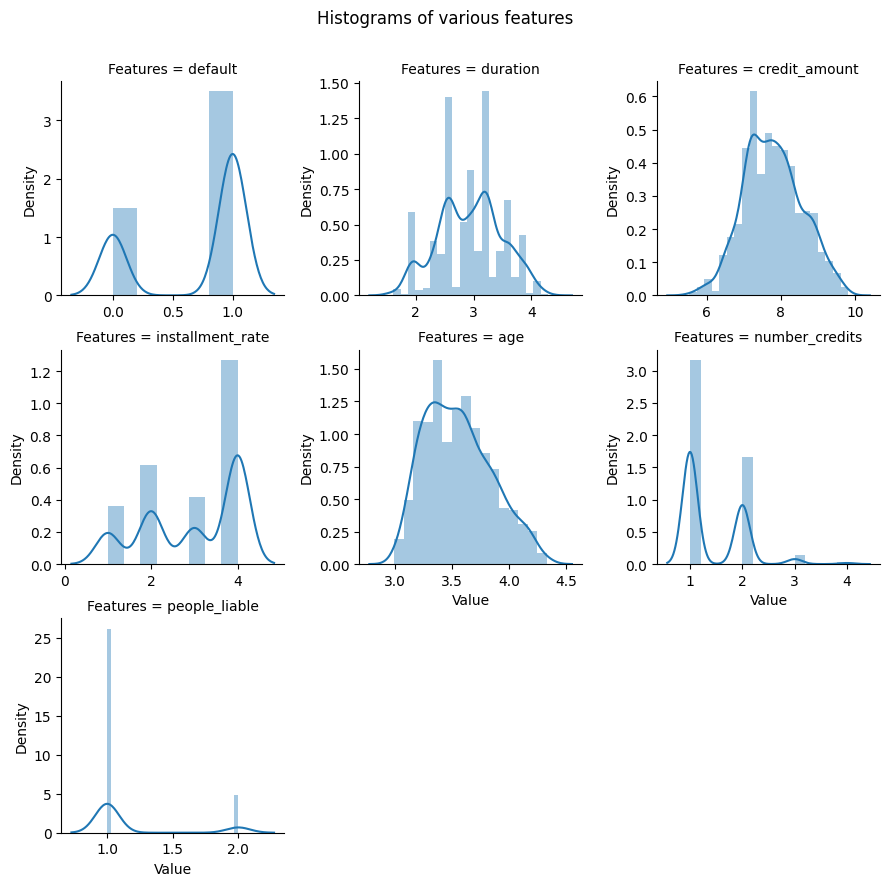

In [315]:
numeric_features = df[num_cols]
numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})
ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")
plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");

In [316]:
df['credit_amount_per_month'] = df['credit_amount'] / df['duration']
num_cols.append('credit_amount_per_month')

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   checking_status          1000 non-null   object 
 1   duration                 1000 non-null   float64
 2   credit_history           1000 non-null   object 
 3   purpose                  1000 non-null   object 
 4   credit_amount            1000 non-null   float64
 5   savings                  1000 non-null   object 
 6   employment               1000 non-null   object 
 7   installment_rate         1000 non-null   int64  
 8   personal_status          1000 non-null   object 
 9   other_debtors            1000 non-null   object 
 10  residence_since          1000 non-null   int64  
 11  property                 1000 non-null   object 
 12  age                      1000 non-null   float64
 13  other_installment        1000 non-null   object 
 14  housing                  

In [318]:
df_label = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_label.head()

,duration,credit_amount,installment_rate,age,number_credits,people_liable,default,credit_amount_per_month,checking_status_... >= 200 DM,checking_status_0 <= ... < 200 DM,...,property_unknown / no property,other_installment_none,other_installment_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed / unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,1.945910,7.064759,4,4.219508,2,1,1,3.630568,False,False,...,False,True,False,True,False,True,False,False,True,True
1,3.891820,8.691483,2,3.135494,1,1,0,2.233269,False,True,...,False,True,False,True,False,True,False,False,False,True
2,2.564949,7.648263,2,3.912023,1,2,1,2.981838,False,False,...,False,True,False,True,False,False,False,True,False,True
3,3.761200,8.972464,2,3.828641,1,2,1,2.385532,False,False,...,False,True,False,False,False,True,False,False,False,True
4,3.218876,8.491055,3,3.988984,2,2,0,2.637894,False,False,...,True,True,False,False,False,True,False,False,False,True


In [343]:
X = df_label.drop('default', axis=1)
y = df_label['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=19)

# Моделирование

Так как мы очень не хотим выдавать кредит ненадежному заложнику, то в первую очередь смотрим на метрику precision.

## Логистическая регрессия

В первую очередь будем смотреть на логистическую регрессию, так как нам важно сохранить интерпретируемость результатов

In [344]:
lr = LogisticRegression(class_weight = {0: 0.3, 1: 0.7})
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_score = lr.predict_proba(X_test)[:,1]

In [345]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('logloss:', log_loss(y_test, y_pred))

roc-auc: 0.8089285714285714
precision: 0.732620320855615
recall: 0.9785714285714285
f1: 0.8379204892966361
logloss: 9.551568148116045


In [346]:
metrics = pd.DataFrame(
    index=['roc-auc', 'precision', 'recall', 'f1', 'logloss'])
metrics['Baseline_LR'] = [roc_auc_score(y_test, y_score),
                          precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          f1_score(y_test, y_pred),
                          log_loss(y_test, y_pred)]
metrics

,Baseline_LR
roc-auc,0.808929
precision,0.732620
recall,0.978571
f1,0.837920
logloss,9.551568


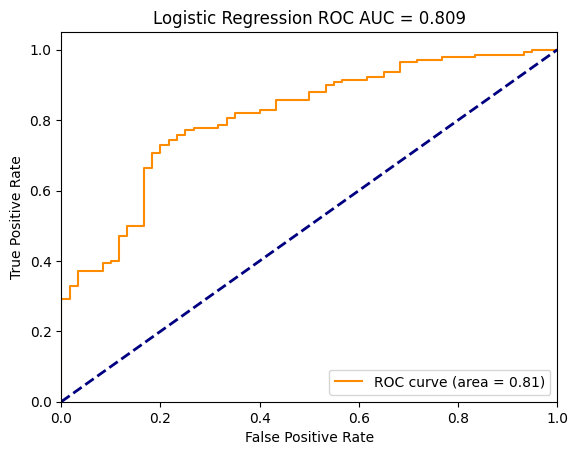

In [347]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

## Подбор параметров

In [367]:
parameters_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.linspace(1, 100, num=1),
    'solver': ['sag', 'saga', 'lbfgs'],
    'l1_ratio': [0, 0.01, 0.05, 0.1, 0.15, 0.2],
    'max_iter': np.arange(100, 500, 1000)
}

lr = LogisticRegression(class_weight={0: 0.3, 1: 0.7})
cv = StratifiedKFold(n_splits=3, shuffle=True)
grid_cv = GridSearchCV(lr, parameters_grid, scoring='precision', cv=cv, verbose=2)

In [368]:
grid_cv.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END C=1.0, l1_ratio=0, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1.0, l1_ratio=0, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1.0, l1_ratio=0, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1.0, l1_ratio=0, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0, max_iter=100, penalty=l2, solver=sag; total time=  

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             estimator=LogisticRegression(class_weight={0: 0.3, 1: 0.7}),
             param_grid={'C': array([1.]),
                         'l1_ratio': [0, 0.01, 0.05, 0.1, 0.15, 0.2],
                         'max_iter': array([100]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'saga', 'lbfgs']},
             scoring='precision', verbose=2)

In [369]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.7359252754017781
{'C': 1.0, 'l1_ratio': 0.01, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}


In [370]:
lr_gr = LogisticRegression(**grid_cv.best_params_, class_weight='balanced')
lr_gr.fit(X_train, y_train)

y_pred_gr = lr_gr.predict(X_test)
y_score_gr = lr_gr.predict_proba(X_test)[:,1]

In [371]:
print('roc-auc:', roc_auc_score(y_test, y_score_gr))
print('precision:', precision_score(y_test, y_pred_gr))
print('recall:', recall_score(y_test, y_pred_gr))
print('f1:', f1_score(y_test, y_pred_gr))
print('logloss:', log_loss(y_test, y_pred_gr))

roc-auc: 0.8047619047619047
precision: 0.8869565217391304
recall: 0.7285714285714285
f1: 0.7999999999999999
logloss: 9.191131614224874


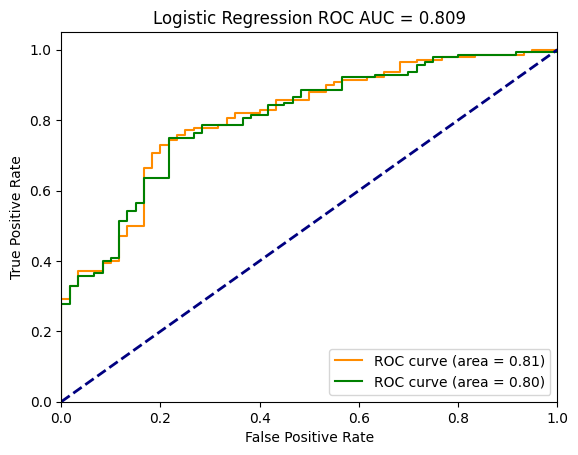

In [372]:
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_score_gr)

roc_auc_2 = auc(fpr_2, tpr_2)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_2, tpr_2, color='green', label='ROC curve (area = %0.2f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [373]:
metrics['Grid_LR'] = [roc_auc_score(y_test, y_score_gr),
                      precision_score(y_test, y_pred_gr),
                      recall_score(y_test, y_pred_gr),
                      f1_score(y_test, y_pred_gr),
                      log_loss(y_test, y_pred_gr)]
metrics

,Baseline_LR,Grid_LR,RFC,Grid_RFC
roc-auc,0.808929,0.804762,0.779583,0.790952
precision,0.732620,0.886957,0.782609,0.750000
recall,0.978571,0.728571,0.900000,0.921429
f1,0.837920,0.800000,0.837209,0.826923
logloss,9.551568,9.191132,8.830695,9.731786


Для лучшей модели получили precision ~ 0.89

In [355]:
lr_gr.coef_

array([[-0.56482706, -0.33989245, -0.22668285,  0.61155065, -0.16268805,
        -0.16315253,  0.12860565,  0.53093354,  0.19955061,  1.60447022,
         1.02735583,  0.5381806 ,  0.24014027, -0.31878875, -0.74134578,
         0.8221473 , -0.109361  , -0.68005449, -0.01032209,  0.16083677,
        -0.07640709, -0.08954757,  0.44444638,  0.77032632,  0.57359084,
         0.45384175,  0.77756418,  0.28832055,  0.24632014,  0.93808739,
        -0.10420122,  0.06860764,  0.23275436,  0.3989925 ,  1.33818703,
         0.1662505 , -0.43034132, -0.37512524, -0.24178018,  0.07867386,
         0.29357698, -0.30661175,  0.82624959,  0.10835612,  0.25291221,
        -0.17128388,  0.08136573,  0.41257309, -0.05948444,  0.37752555,
        -0.80873959]])

In [356]:
feature_imp = pd.DataFrame()
feature_imp['feature'] = X.columns
feature_imp['imp'] = lr_gr.coef_[0]
feature_imp = feature_imp.sort_values(by='imp', ascending=False)
feature_imp

,feature,imp
9,checking_status_no checking account,1.604470
34,other_debtors_guarantor,1.338187
10,credit_history_critical account / other credit...,1.027356
29,employment_4 <= ... < 7 years,0.938087
42,other_installment_none,0.826250
15,purpose_car (used),0.822147
26,savings_unknown/ no savings account,0.777564
23,savings_... >= 1000 DM,0.770326
3,age,0.611551
24,savings_100 <= ... < 500 DM,0.573591


## RandomForest

Интереса ради можем посмотреть на случайный лес. Он не дает нам такую же прозрачность ответов как логистическая регрессия, поэтому использовать его не так удобно

In [357]:
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
y_score = rfc.predict_proba(X_test)[:,1]

In [358]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('logloss:', log_loss(y_test, y_pred))

roc-auc: 0.7795833333333333
precision: 0.782608695652174
recall: 0.9
f1: 0.8372093023255814
logloss: 8.830695080333703


In [359]:
metrics['RFC'] = [roc_auc_score(y_test, y_score),
                          precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          f1_score(y_test, y_pred),
                          log_loss(y_test, y_pred)]
metrics

,Baseline_LR,Grid_LR,RFC
roc-auc,0.808929,0.803333,0.779583
precision,0.732620,0.885965,0.782609
recall,0.978571,0.721429,0.900000
f1,0.837920,0.795276,0.837209
logloss,9.551568,9.371350,8.830695


## Подбор параметров для случайного леса

In [360]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc = RandomForestClassifier(random_state=10)
cv = StratifiedKFold(n_splits=3, shuffle=True)
grid_cv_rfc = GridSearchCV(rfc, param_grid, scoring='precision', cv=cv, verbose=2)

In [361]:
grid_cv_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500; total time=   0.4

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='precision', verbose=2)

In [362]:
print(grid_cv_rfc.best_score_)
print(grid_cv_rfc.best_params_)

0.7549823053379715
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [363]:
rfc_gr = RandomForestClassifier(**grid_cv_rfc.best_params_, random_state=19)
rfc_gr.fit(X_train, y_train)

y_pred_gr = rfc_gr.predict(X_test)
y_score_gr = rfc_gr.predict_proba(X_test)[:,1]

In [364]:
print('roc-auc:', roc_auc_score(y_test, y_score_gr))
print('precision:', precision_score(y_test, y_pred_gr))
print('recall:', recall_score(y_test, y_pred_gr))
print('f1:', f1_score(y_test, y_pred_gr))
print('logloss:', log_loss(y_test, y_pred_gr))

roc-auc: 0.790952380952381
precision: 0.75
recall: 0.9214285714285714
f1: 0.826923076923077
logloss: 9.73178641506163


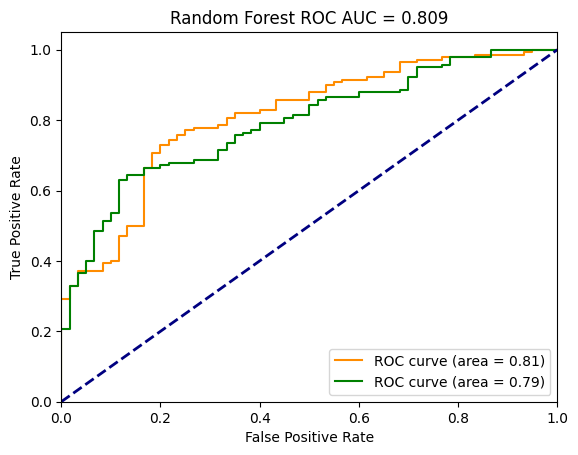

In [365]:
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_score_gr)

roc_auc_2 = auc(fpr_2, tpr_2)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_2, tpr_2, color='green', label='ROC curve (area = %0.2f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Random Forest ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [366]:
metrics['Grid_RFC'] = [roc_auc_score(y_test, y_score_gr),
                      precision_score(y_test, y_pred_gr),
                      recall_score(y_test, y_pred_gr),
                      f1_score(y_test, y_pred_gr),
                      log_loss(y_test, y_pred_gr)]
metrics

,Baseline_LR,Grid_LR,RFC,Grid_RFC
roc-auc,0.808929,0.803333,0.779583,0.790952
precision,0.732620,0.885965,0.782609,0.750000
recall,0.978571,0.721429,0.900000,0.921429
f1,0.837920,0.795276,0.837209,0.826923
logloss,9.551568,9.371350,8.830695,9.731786


Результаты получились даже хуже, чем у первоначальной модели. Так что большого смысла в использовании RFC нет